### Decision Tree Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Data Ingestion

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


1. AT - Atmospheric Temprature
2. V - Vaccum Pressure in the boiler
3. AP - Atmospheric Pressure
4. Relative Humidity
5. PE - Power Output in MegaWatt

In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(41)

In [8]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


### Step - 3 Seprate X and Y

In [9]:
X = df.drop(columns=["PE"])
Y = df["PE"]

In [10]:
X

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9522,15.12,48.92,1011.80,72.93
9523,33.41,77.95,1010.30,59.72
9524,15.99,43.34,1014.20,78.66
9525,17.65,59.87,1018.58,94.65


In [11]:
Y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9522    462.59
9523    432.90
9524    465.96
9525    450.93
9526    451.67
Name: PE, Length: 9527, dtype: float64

<Axes: xlabel='PE', ylabel='Count'>

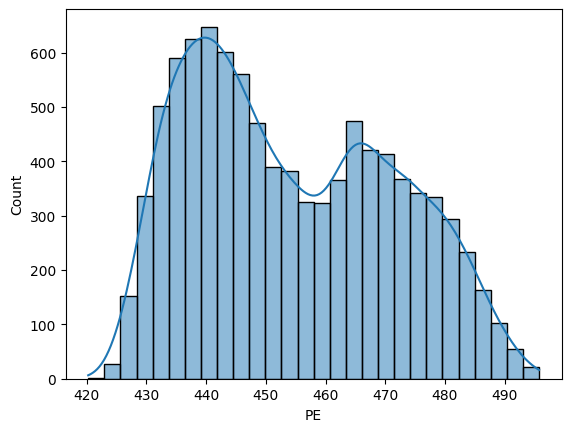

In [13]:
import seaborn as sns
sns.histplot(data=df,x="PE",kde=True)

### Step - 4 Apply Preprocessing on X

In [14]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
numpipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [17]:
X_Pre = numpipe.fit_transform(X)
X_Pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - Apply train Test Split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_Pre, Y, test_size=0.2, random_state=21)

In [21]:
xtrain.shape

(7621, 4)

In [22]:
xtest.shape

(1906, 4)

### Step 6 - Model Building and Tuning

In [28]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_leaf=5,
    min_samples_split=5,
    criterion="absolute_error"
)
model1.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1,
                      min_samples_leaf=5, min_samples_split=5)

In [29]:
model1.score(xtrain,ytrain)

0.7177923616571229

In [30]:
model1.score(xtest, ytest)


0.7199818259925854

In [31]:
params = {
    "max_depth":[2,3,4,5,6,7,8,9,10],
    "min_samples_split":[5,6,7,8,9,10],
    "min_samples_leaf":[5,6,7,8,9,10],
    "criterion":["squared_error", "absoulte_error"]
    }

In [37]:
from sklearn.model_selection import RandomizedSearchCV
dtr = DecisionTreeRegressor()
rscv = RandomizedSearchCV(dtr, param_distributions=params,scoring="r2",cv=5,n_jobs=-1)
rscv.fit(xtrain,ytrain)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absoulte_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10]},
                   scoring='r2')

In [38]:
rscv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_depth': 10,
 'criterion': 'squared_error'}

In [39]:
rscv.best_score_

np.float64(0.9394896768854455)

In [40]:
best_dtr = rscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=8)

### Step 7 - Model Evaluation

In [41]:
best_dtr.score(xtrain,ytrain)

0.9622455900739747

In [42]:
best_dtr.score(xtest, ytest)

0.9449848682434077

In [43]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [55]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")


In [56]:
evaluate_model(best_dtr, xtrain, ytrain)



RMSE : 3.31
MAE : 2.43
MAPE : 0.54%
R2 : 96.22%


In [57]:
evaluate_model(best_dtr, xtest, ytest)

RMSE : 4.00
MAE : 2.96
MAPE : 0.65%
R2 : 94.50%


In [61]:
import matplotlib.pyplot as plt

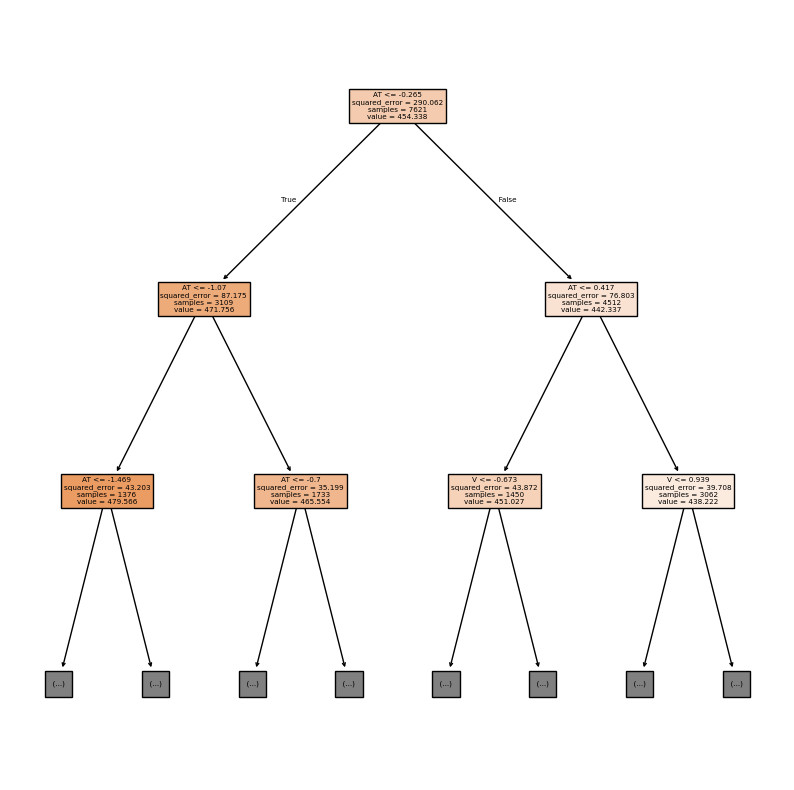

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plot_tree(best_dtr, feature_names=xtrain.columns, filled=True, max_depth=2)
plt.show()


In [58]:
best_dtr.feature_importances_

array([0.9325799 , 0.04759455, 0.01067805, 0.0091475 ])

In [59]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [60]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)

In [62]:
imp

AT    0.932580
V     0.047595
AP    0.010678
RH    0.009147
dtype: float64

<Axes: >

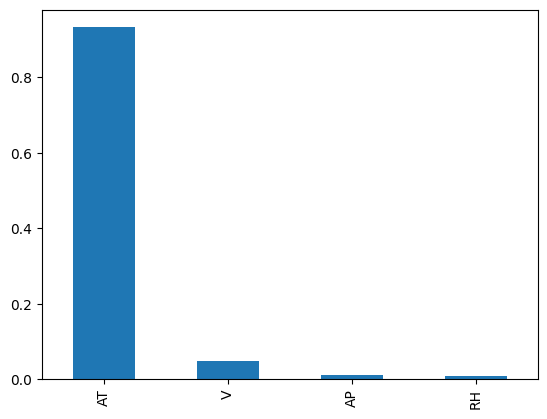

In [63]:
imp.plot(kind="bar")

### Step 8 - Out of Sample 

In [68]:
xnew = pd.read_csv("PowerPlantTest.csv")

In [69]:
xnew.head()

,AT,V,AP,RH
0,25,51.0,1012,91
1,31,60.0,1005,50
2,20,47.0,1003,83
3,38,67.0,1008,70
4,23,NaN,1013,54


In [70]:
numpipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [71]:
xnew_pre = numpipe.transform(xnew)

In [72]:
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.259618,-0.208256,1.209376
1,1.523612,0.449845,-1.386664,-1.597546
2,0.045913,-0.574935,-1.723353,0.661684
3,2.463966,1.001650,-0.881632,-0.228316
4,0.448922,-0.174482,-0.039912,-1.323700


In [73]:
preds = best_dtr.predict(xnew_pre)
preds

array([447.356     , 434.66461538, 447.681     , 431.07294118,
       451.435     ])

In [74]:
xnew["Preds_"] = preds

In [75]:
xnew

,AT,V,AP,RH,Preds_
0,25,51.0,1012,91,447.356000
1,31,60.0,1005,50,434.664615
2,20,47.0,1003,83,447.681000
3,38,67.0,1008,70,431.072941
4,23,NaN,1013,54,451.435000


In [76]:
xnew.to_csv("results", index=False)

In [78]:
import joblib

joblib.dump(numpipe, "npipe.joblib")

['npipe.joblib']

In [79]:
joblib.dump(best_dtr, "dtr.joblib")

['dtr.joblib']

In [82]:
p = joblib.load("npipe.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [84]:
m = joblib.load("dtr.joblib")
m

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=8)